In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import pickle
import numpy as np

from SlideRunner.dataAccess.database import Database
from lib.calculate_F1 import *


# Evaluation file for 10 HPF (2.37mm^2) subsets

## Binucleated Cells

### Optimize threshold value

Optimizing threshold for validation set of 21 files:  c3eb4b8382b470dd63a9.svs,fff27b79894fe0157b08.svs,2f17d43b3f9e7dacf24c.svs,ac1168b2c893d2acad38.svs,a0c8b612fe0655eab3ce.svs,34eb28ce68c1106b2bac.svs,3f2e034c75840cb901e6.svs,8bebdd1f04140ed89426.svs,39ecf7f94ed96824405d.svs,20c0753af38303691b27.svs,2efb541724b5c017c503.svs,2f2591b840e83a4b4358.svs,91a8e57ea1f9cb0aeb63.svs,066c94c4c161224077a9.svs,9374efe6ac06388cc877.svs,dd6dd0d54b81ebc59c77.svs,285f74bb6be025a676b6.svs,2e611073cff18d503cea.svs,ce949341ba99845813ac.svs,70ed18cd5f806cf396f0.svs,0e56fd11a762be0983f0.svs
Best threshold: F1= 0.45991637884021086 Threshold= 0.5600000000000003


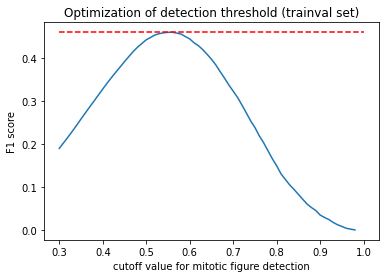

In [2]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti.sqlite'

resfile = 'results/RetinaNet-BiMulti_ODAELexport.pth-ODAEL_val-val-inference_results_boxes.p.bz2'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, hotclass=5, detclass=1, minthres=0.3, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
#plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.3,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.3, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')




In [3]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti_10HPF.sqlite'
resfile = 'results/RetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=5, detclass=1, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(511,)]
Overall: 
TP: 86.0 FP: 94 FN:  79.0 F1: 0.498550710186936
Number of all cells: 165
Precision: 0.478 
Recall: 0.521
F1 score:  0.499


## Dual Stage (RetinaNet + ResNet)

Optimizing threshold for validation set of 21 files:  c3eb4b8382b470dd63a9.svs,fff27b79894fe0157b08.svs,2f17d43b3f9e7dacf24c.svs,ac1168b2c893d2acad38.svs,a0c8b612fe0655eab3ce.svs,34eb28ce68c1106b2bac.svs,3f2e034c75840cb901e6.svs,8bebdd1f04140ed89426.svs,39ecf7f94ed96824405d.svs,20c0753af38303691b27.svs,2efb541724b5c017c503.svs,2f2591b840e83a4b4358.svs,91a8e57ea1f9cb0aeb63.svs,066c94c4c161224077a9.svs,9374efe6ac06388cc877.svs,dd6dd0d54b81ebc59c77.svs,285f74bb6be025a676b6.svs,2e611073cff18d503cea.svs,ce949341ba99845813ac.svs,70ed18cd5f806cf396f0.svs,0e56fd11a762be0983f0.svs
Best threshold: F1= 0.6305987099118743 Threshold= 0.7700000000000005


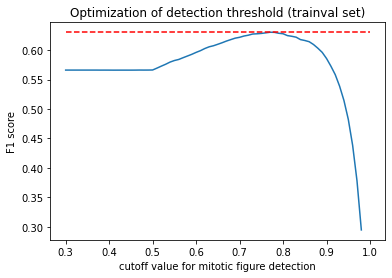

In [4]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti.sqlite'

resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL_val-val-inference_results_boxes.p.bz2'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, hotclass=5, detclass=0, minthres=0.3, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
#plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.3,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.3, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')




### Evaluation on Database Ground Truth

In [5]:
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti_10HPF.sqlite'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=5, detclass=0, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(511,)]
Overall: 
TP: 111 FP: 57 FN:  54 F1: 0.6666666466466473
Number of all cells: 165
Precision: 0.661 
Recall: 0.673
F1 score:  0.667


### Evaluation on 2-Pathologist Vote

In [6]:
databasefile = 'databases/BiMulti_MultiPathologistGT_twoExpertConsensus.sqlite'
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=1, detclass=0, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(275,)]
Overall: 
TP: 97 FP: 71.0 FN:  178 F1: 0.4379232406789336
Number of all cells: 275
Precision: 0.577 
Recall: 0.353
F1 score:  0.438


### Evaluation on 3-Pathologist Vote

In [7]:
databasefile = 'databases/BiMulti_MultiPathologistGT_ConsensusOfThree.sqlite'
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=1, detclass=0, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(110,)]
Overall: 
TP: 59 FP: 109.0 FN:  51 F1: 0.424460416386316
Number of all cells: 110
Precision: 0.351 
Recall: 0.536
F1 score:  0.424


# Multinucleated cells

## Single stage (RetinaNet)

### Optimization of threshold

Optimizing threshold for validation set of 21 files:  c3eb4b8382b470dd63a9.svs,fff27b79894fe0157b08.svs,2f17d43b3f9e7dacf24c.svs,ac1168b2c893d2acad38.svs,a0c8b612fe0655eab3ce.svs,34eb28ce68c1106b2bac.svs,3f2e034c75840cb901e6.svs,8bebdd1f04140ed89426.svs,39ecf7f94ed96824405d.svs,20c0753af38303691b27.svs,2efb541724b5c017c503.svs,2f2591b840e83a4b4358.svs,91a8e57ea1f9cb0aeb63.svs,066c94c4c161224077a9.svs,9374efe6ac06388cc877.svs,dd6dd0d54b81ebc59c77.svs,285f74bb6be025a676b6.svs,2e611073cff18d503cea.svs,ce949341ba99845813ac.svs,70ed18cd5f806cf396f0.svs,0e56fd11a762be0983f0.svs
Best threshold: F1= 0.3494539781591264 Threshold= 0.6800000000000004


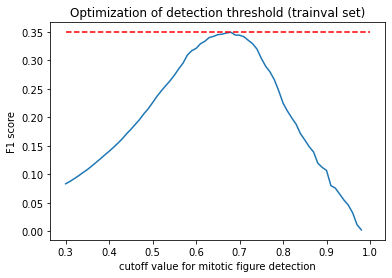

In [8]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti.sqlite'

resfile = 'results/RetinaNet-BiMulti_ODAELexport.pth-ODAEL_val-val-inference_results_boxes.p.bz2'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, hotclass=6, detclass=0, minthres=0.3, resfile=resfile)


import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
#plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.3,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.3, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')




In [9]:
databasefile = 'MITOS_WSI_CCMCT_BiMulti__ODAEL_10HPF.sqlite'
resfile = 'results/RetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti_10HPF.sqlite'


F1, individ = calculate_F1(databasefile=databasefile, hotclass=6, detclass=0, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(138,)]
Overall: 
TP: 18 FP: 7.0 FN:  27 F1: 0.514285640816337
Number of all cells: 45
Precision: 0.720 
Recall: 0.400
F1 score:  0.514


## Dual-Stage

### Optimization of threshold

Optimizing threshold for validation set of 21 files:  c3eb4b8382b470dd63a9.svs,fff27b79894fe0157b08.svs,2f17d43b3f9e7dacf24c.svs,ac1168b2c893d2acad38.svs,a0c8b612fe0655eab3ce.svs,34eb28ce68c1106b2bac.svs,3f2e034c75840cb901e6.svs,8bebdd1f04140ed89426.svs,39ecf7f94ed96824405d.svs,20c0753af38303691b27.svs,2efb541724b5c017c503.svs,2f2591b840e83a4b4358.svs,91a8e57ea1f9cb0aeb63.svs,066c94c4c161224077a9.svs,9374efe6ac06388cc877.svs,dd6dd0d54b81ebc59c77.svs,285f74bb6be025a676b6.svs,2e611073cff18d503cea.svs,ce949341ba99845813ac.svs,70ed18cd5f806cf396f0.svs,0e56fd11a762be0983f0.svs
Best threshold: F1= 0.5952045133991537 Threshold= 0.5400000000000003


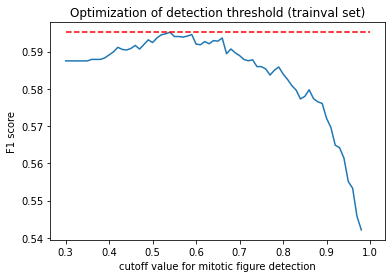

In [10]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti.sqlite'

resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL_val-val-inference_results_boxes.p.bz2'
thr, F1scores, thrs = optimize_threshold(databasefile=databasefile, hotclass=6, detclass=2, minthres=0.3, resfile=resfile)

import matplotlib.pyplot as plt 
plt.plot(thrs, F1scores)
plt.xlabel('cutoff value for mitotic figure detection')
plt.ylabel('F1 score')
plt.title('Optimization of detection threshold (trainval set)')
#plt.text(0.7, 0.5, 'max: %.3f @ %.2f' % (np.max(np.array(F1scores)),np.arange(0.3,0.99,0.01)[np.argmax(F1scores)]))
plt.plot([0.3, 1.0], np.max(np.array(F1scores))*np.array([1,1]),'r--')




### Comparison against database Ground Truth

In [11]:
databasefile = 'databases/MITOS_WSI_CCMCT_ODAEL_BiMulti_10HPF.sqlite'
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=6, detclass=2, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(138,)]
Overall: 
TP: 25.0 FP: 3 FN:  20.0 F1: 0.6849314130230941
Number of all cells: 45
Precision: 0.893 
Recall: 0.556
F1 score:  0.685


### Evaluation on 2 pathologist vote

In [12]:
databasefile = 'databases/BiMulti_MultiPathologistGT.sqlite'
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=2, detclass=2, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(57,)]
Overall: 
TP: 17.0 FP: 11 FN:  40.0 F1: 0.399999952941182
Number of all cells: 57
Precision: 0.607 
Recall: 0.298
F1 score:  0.4


### Evaluation on 3-pathologist vote

In [13]:
databasefile = 'databases/BiMulti_MultiPathologistGT_ConsensusOfThree.sqlite'
resfile = 'results/2ndstage_CellClassifier_128px_BiMulti_b2.pthRetinaNet-BiMulti_ODAELexport.pth-ODAEL-inference_results_boxes_10HPF_subset.p.bz2'

F1, individ = calculate_F1(databasefile=databasefile, hotclass=2, detclass=2, resfile=resfile, det_thres=thr)

print('F1 score: ', np.round(F1,3))


Calculating F1 for test set of 11 files
Official count of relevant cells in DB:  [(26,)]
Overall: 
TP: 13.0 FP: 15 FN:  13.0 F1: 0.48148139231826065
Number of all cells: 26
Precision: 0.464 
Recall: 0.500
F1 score:  0.481
